<a href="https://colab.research.google.com/github/rroxy08/CE888/blob/master/Lab2/Lab2bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np



In [13]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
#def boostrap_mean(sample, sample_size, n_iterations):
	#return data_mean, lower, upper

def boostrap_mean(sample, sample_size, n_iterations):
	std_array=[]

	data_mean=np.mean(sample)
	std_array.append(data_mean)
 
	boot_mean_array=[]
	for i in range(0,n_iterations):
		sample_mean=[]
		for j in range(sample_size):
			index=np.random.randint(sample_size)
			sample_mean.append(sample[index])
		mean_val=np.mean(sample_mean)
		boot_mean_array.append(mean_val)
	
	boot_mean_array=np.sort(boot_mean_array)       # 95% confidence intervals
	lower =np.percentile(boot_mean_array,2.5)
	upper=np.percentile(boot_mean_array,97.5)
	std_array.append(lower)
	std_array.append(upper)
	
	return std_array

(0, 100000)

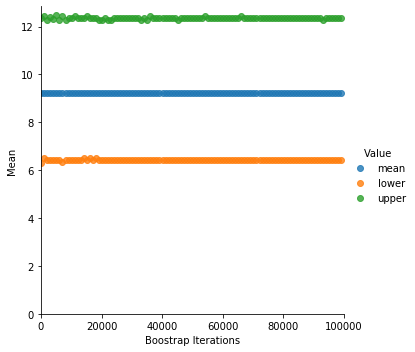

In [0]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)






Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
	# <---INSERT YOUR CODE HERE--->
	std_array=[]

	data_mean=np.mean(sample)
	std_array.append(data_mean)
 
	boot_mean_array=[]
	for i in range(0,iterations):
		sample_mean=[]
		for j in range(sample_size):
			index=np.random.randint(sample_size)
			sample_mean.append(sample[index])
		mean_val=np.mean(sample_mean)
		boot_mean_array.append(mean_val)
	
	boot_mean_array=np.sort(boot_mean_array)       # 95% confidence intervals

	low_ci=(100-ci)/2
	up_ci=ci+low_ci


	lower =np.percentile(boot_mean_array,low_ci)
	upper=np.percentile(boot_mean_array,up_ci)
	std_array.append(lower)
	std_array.append(upper)
 
	return std_array

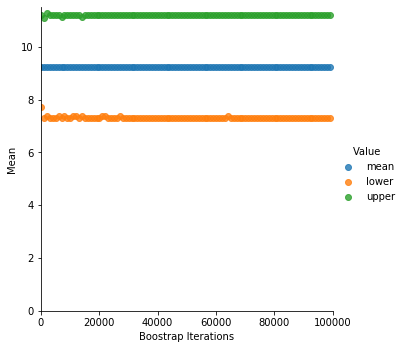

In [0]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


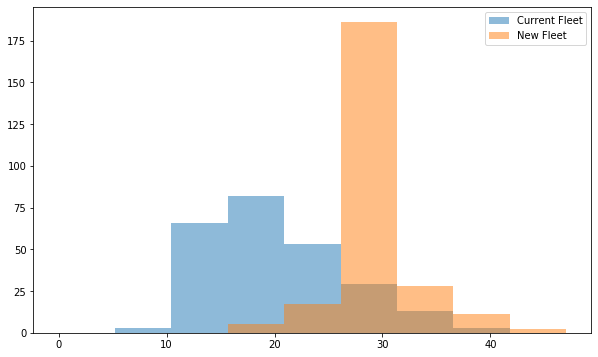

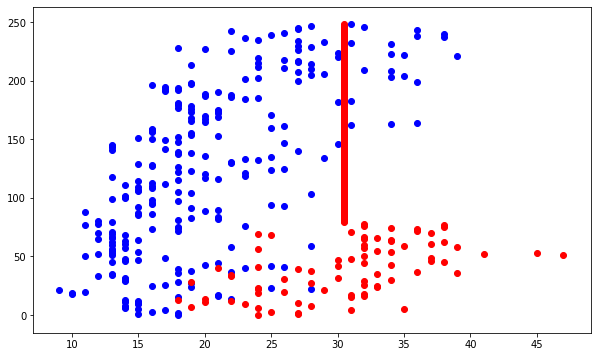

In [16]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
df_v = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df_v=df_v.fillna(value=np.mean(df_v))

c_fleet = df_v.values.T[0]
n_fleet=df_v.values.T[1]
y1=[]
y2=[]

bins = np.linspace(0, np.max(n_fleet),10)

plt.figure(figsize= (10,6))
plt.hist(c_fleet, bins, alpha=0.5, label='Current Fleet')
plt.hist(n_fleet, bins, alpha=0.5, label='New Fleet')
plt.legend(loc='upper right')
plt.show()

a=np.size(c_fleet)
b=np.size(n_fleet)
for i in range(a):
  y1.append(i)
a=np.size(c_fleet)
for i in range(b):
  y2.append(i)
plt.figure(figsize= (10,6))

plt.scatter(c_fleet,y1,c='blue')
plt.scatter(n_fleet,y2,c='red')
#plt.hist(n_fleet, bins, alpha=0.5, label='New Fleet')
#plt.legend(loc='upper right')
plt.show()

# Note: you can add more cells as needed to organise your code and your plots


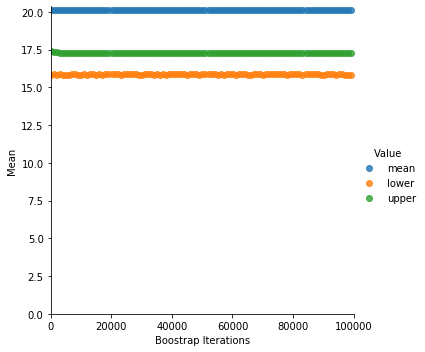

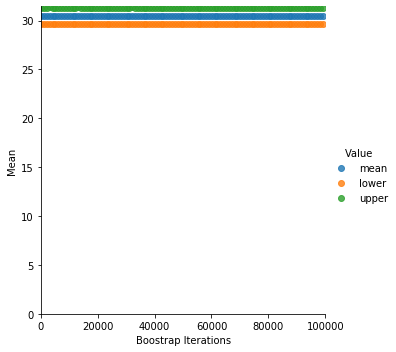

In [35]:
# Compare the two fleets.

boots_c = []
boots_n = []
diff_array=[]
cfleet_lower_diff=[]
cfleet_upper_diff=[]
nfleet_lower_diff=[]
nfleet_upper_diff=[]

cfleet_mean=np.mean(c_fleet)
nfleet_mean=np.mean(n_fleet)
mean_obs=np.abs(cfleet_mean-nfleet_mean)

for i in range(100,100000,1000):
    boot =boostrap_mean(c_fleet,a,i)
    #boot = boostrap_mean_ci(c_fleet,a, i, 95)       #a= size of the array c_fleet
    boots_c.append([i, boot[0], "mean"])
    boots_c.append([i, boot[1], "lower"])
    boots_c.append([i, boot[2], "upper"])

    boot1 =boostrap_mean(n_fleet,b,i)
    #boot1 = boostrap_mean_ci(n_fleet,b, i, 95)       #b= size of the array n_fleet
    boots_n.append([i, boot1[0], "mean"])
    boots_n.append([i, boot1[1], "lower"])
    boots_n.append([i, boot1[2], "upper"])


df_boot = pd.DataFrame(boots_c, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)
sns_plot.set_titles("Current fleet")

sns_plot.savefig("bootstrap_confidence_95.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_95.pdf", bbox_inches='tight')

df_boot = pd.DataFrame(boots_n, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)
sns_plot.set_titles("New fleet")
sns_plot.savefig("bootstrap_confidence_95.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_95.pdf", bbox_inches='tight')

# You can create a permutation test function to do this. Check the lecture notes!

In [36]:
concat = c_fleet+ n_fleet
perm = np.random.permutation(concat)

pold = perm[:int(len(perm)/2)]
pnew = perm[int(len(perm)/2):]

diff_array=[]

pold_mean=np.mean(pold)
pnew_mean=np.mean(pnew)
mean_obs=np.abs(pold_mean-pnew_mean)

a=np.size(pold)
b=np.size(pnew)

iteration=0
for i in range(100,100000,1000):
    boot =boostrap_mean(pold,a,i)
    #boot = boostrap_mean_ci(c_fleet,a, i, 95)       #a= size of the array c_fleet
    boots_c.append([i, boot[0], "mean"])
    boots_c.append([i, boot[1], "lower"])
    boots_c.append([i, boot[2], "upper"])

    boot1 =boostrap_mean(pnew,b,i)
    #boot1 = boostrap_mean_ci(n_fleet,b, i, 95)       #b= size of the array n_fleet
    boots_n.append([i, boot1[0], "mean"])
    boots_n.append([i, boot1[1], "lower"])
    boots_n.append([i, boot1[2], "upper"])

    diff_array.append(np.abs(boot[0]-boot1[0]))
    
    iteration+=1

prob=0

for j in range(iteration):
  if(diff_array[j]>=mean_obs):
    prob+=1

p_val=prob/iteration

print("P value is: ",p_val)

if(p_val>0.05):
  print("The two fleets has no difference")
else:
  print("The new fleet is good")

P value is:  1.0
The two fleets has no difference
